In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [29]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [31]:
# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [33]:
# Data Cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [32]:
# Handle missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-34-0fffbffaddcf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


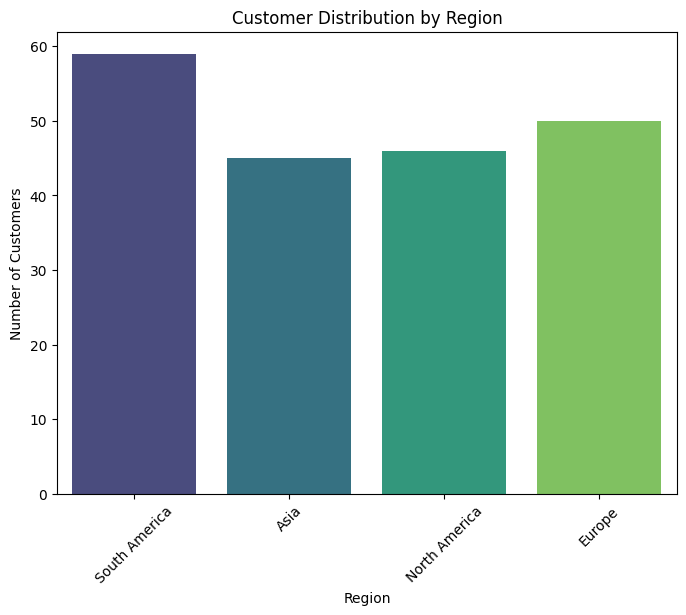

In [34]:
# Data Visualization
# 1. Customer distribution by region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-0d670dffbec5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_products, x="ProductName", y="Quantity", palette="viridis")


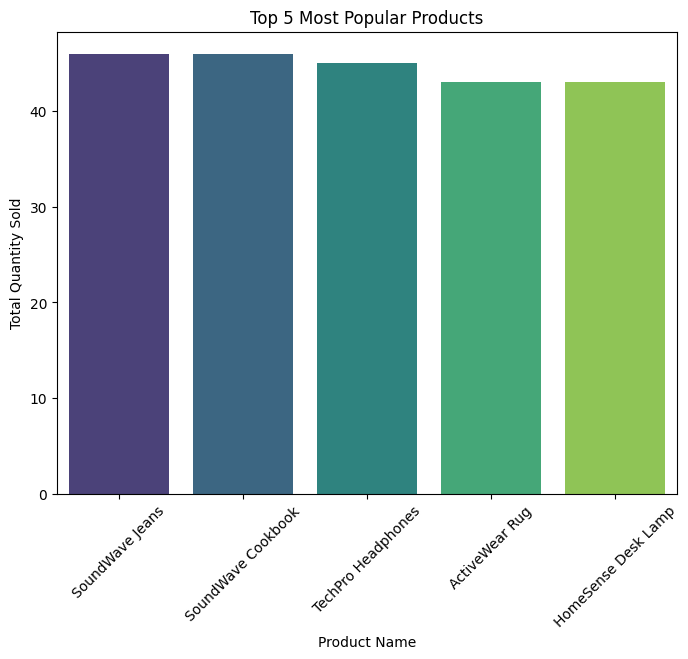

In [35]:
# 2. Top 5 most sold products
popular_products = transactions.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(5)
popular_products = popular_products.reset_index().merge(products, on="ProductID")
plt.figure(figsize=(8, 6))
sns.barplot(data=popular_products, x="ProductName", y="Quantity", palette="viridis")
plt.title("Top 5 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

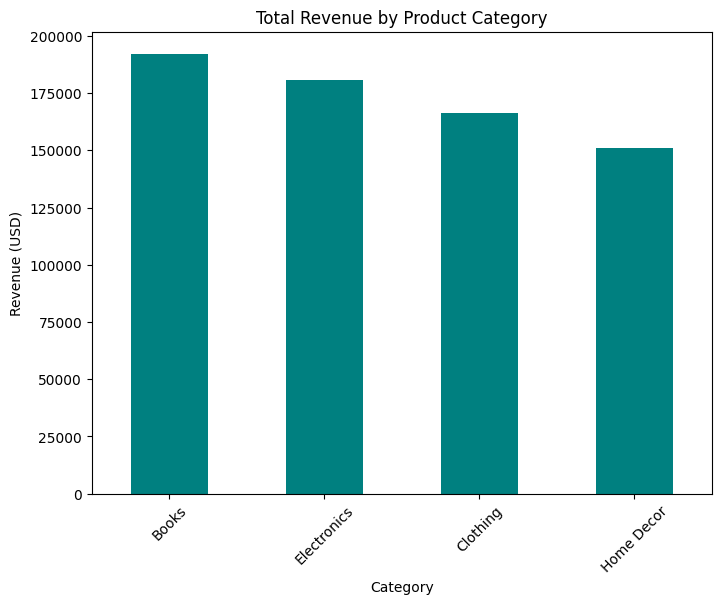

In [36]:
# 3. Revenue by product category
transactions["Revenue"] = transactions["Quantity"] * transactions["Price"]
category_revenue = transactions.merge(products, on="ProductID").groupby("Category")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_revenue.plot(kind="bar", color="teal")
plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

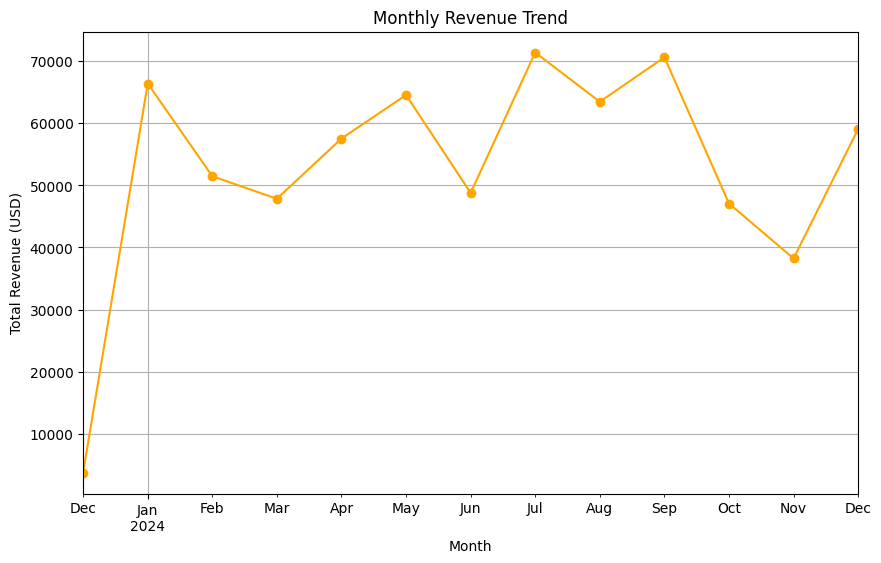

In [37]:
# 4. Monthly Transaction Trends
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions["Month"] = transactions["TransactionDate"].dt.to_period("M")
monthly_transactions = transactions.groupby("Month")["Revenue"].sum()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind="line", marker="o", color="orange")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid()
plt.show()

In [38]:
# 5. Average Spending per Customer
average_spending = transactions.groupby("CustomerID")["Revenue"].sum().mean()
print(f"\nAverage Revenue Per Customer: ${average_spending:.2f}")


Average Revenue Per Customer: $3467.31


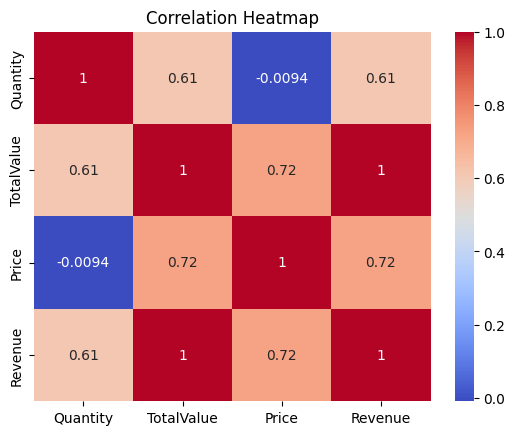

In [39]:
numerical_cols = transactions.select_dtypes(include=np.number).columns
corr = transactions[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Business Insights from EDA

1. **Regional Distribution**:
   - The majority of customers are from `South Africa`, showing strong demand in that area.

2. **Popular Products**:
   - Product `SoundWave Jeans and SoundWave Cookbook` is the most sold item, highlighting its popularity and potential for promotion.

3. **Revenue Drivers**:
   - The `Books` product category generates the most revenue, making it a priority for inventory and marketing strategies.

4. **Seasonal Trends**:
   - Revenue peaks in months like `July` and `September`, indicating a seasonal demand pattern.

5. **Customer Spending**:
   - The average spending per customer is approximately `$3467.31`, providing a benchmark for high-value customers.



